In [1]:
import traci
import matplotlib.pyplot as plt

In [2]:
sumoBinary = "sumo"
sumoCmd = [sumoBinary, "-c", "simulacao.sumocfg"]


In [ ]:
traci.start(sumoCmd)

simulation_data = {
    'traffic_lights': [],
    'data': []
}

traffic_lights = traci.trafficlight.getIDList()

for traffic_light in traffic_lights:

    traffic_light_data = {
        'id': traffic_light,
        'controlled_edges': [],
    }

    traffic_light_controlled_lanes = traci.trafficlight.getControlledLanes(
        traffic_light)
    
    traffic_light_data['controlled_lanes'] = list(traffic_light_controlled_lanes)
    
    controlled_lanes = []

    for traffic_light_controlled_lane in traffic_light_controlled_lanes:
        controlled_lanes.append(traffic_light_controlled_lane.split('_')[0])
    
    controlled_edges = list(set(controlled_lanes))

    for controlled_edge in controlled_edges:
        edge_data = {
            'id': controlled_edge,
            'lanes': traci.edge.getLaneNumber(controlled_edge),
        }

        traffic_light_data['controlled_edges'].append(edge_data)

    simulation_data['traffic_lights'].append(traffic_light_data)

step = 0

while traci.simulation.getMinExpectedNumber() > 0:

    traci.simulationStep()
    step += 1

    step_info = {
        'step': step,
        'traffic_lights': [],
    }

    for traffic_light in simulation_data['traffic_lights']:

        traffic_light_info = {
            'id': traffic_light['id'],
            'controlled_edges': [],
        }

        for controlled_edge in traffic_light['controlled_edges']:
            waiting_time = traci.edge.getWaitingTime(controlled_edge['id'])
            waiting_vehicle_count = traci.edge.getLastStepHaltingNumber(
                controlled_edge['id'])
            
            edge_info = {
                'id': controlled_edge['id'],
                'waiting_time': waiting_time,
                'waiting_vehicle_count': waiting_vehicle_count,
                'avg_queue_length': round(waiting_vehicle_count / controlled_edge['lanes'], 2),
            }

            traffic_light_info['controlled_edges'].append(edge_info)
        
        step_info['traffic_lights'].append(traffic_light_info)

    simulation_data['data'].append(step_info)

    step += 1

traci.close()

simulation_data


In [ ]:
traci.close()

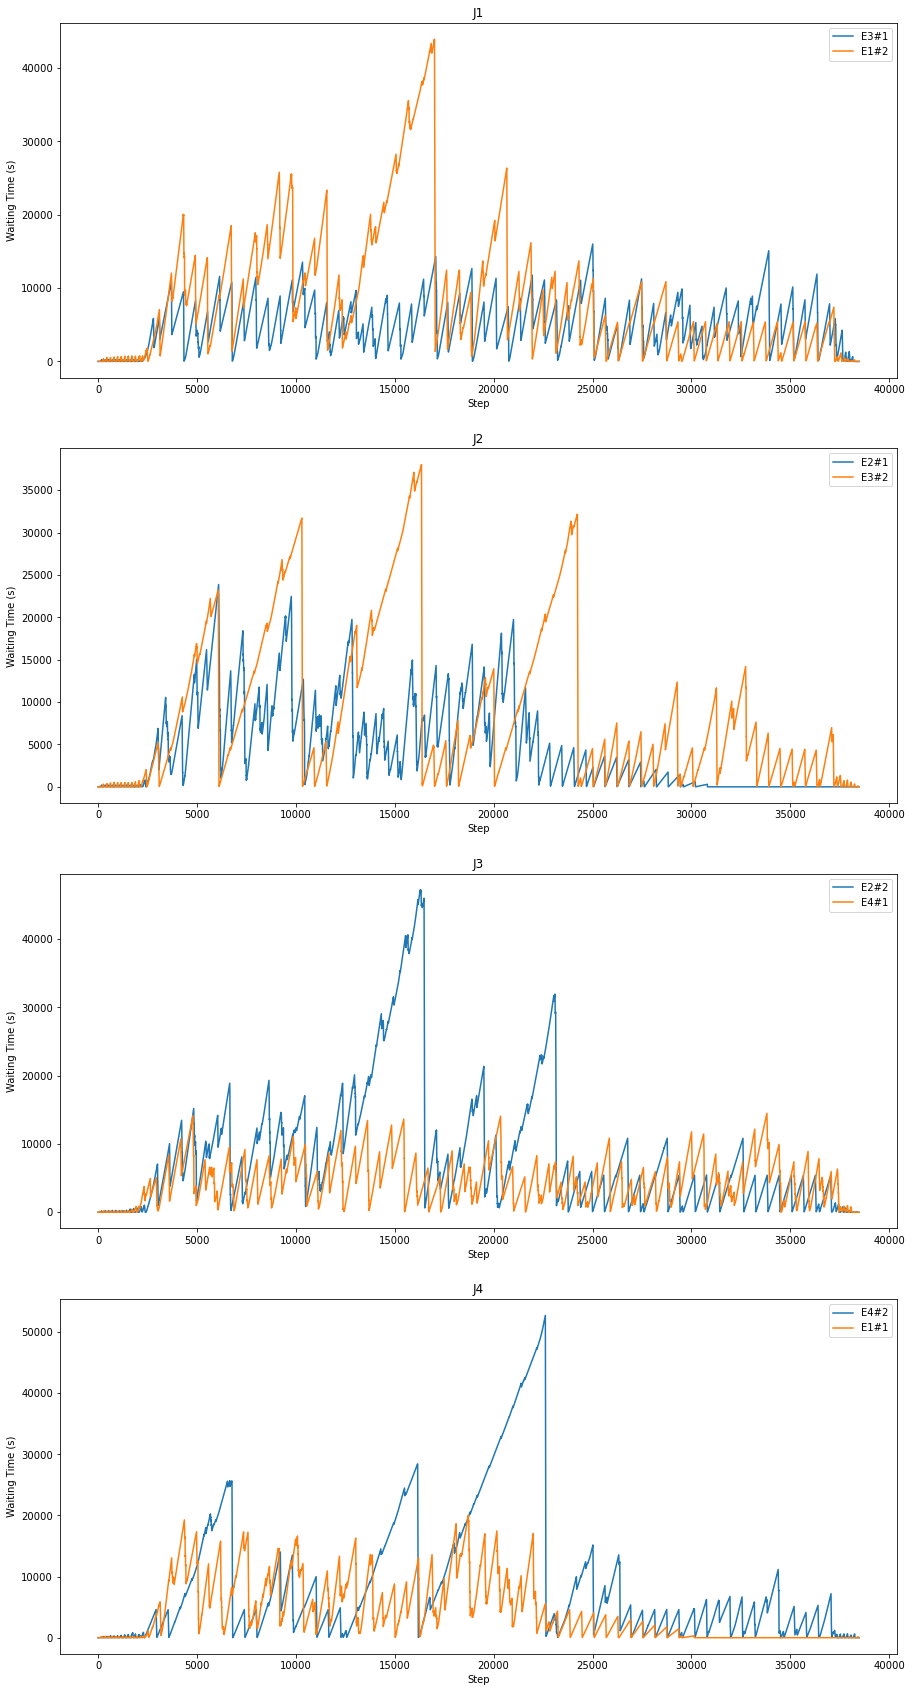

In [4]:
# Total Waiting Time By Traffic Light

plt.figure(figsize=(15, 30))

steps = [_['step'] for _ in simulation_data['data']]

traffic_lights_count = len(simulation_data['traffic_lights'])

for idx, traffic_light in enumerate(simulation_data['traffic_lights']):

    plt.subplot(traffic_lights_count, 1, idx + 1)
    plt.title(traffic_light['id'])
    plt.xlabel('Step')
    plt.ylabel('Waiting Time (s)')

    traffic_light_data = {}

    for edge in traffic_light['controlled_edges']:
        traffic_light_data[edge['id']] = []

    for step in simulation_data['data']:
        for step_traffic_light in step['traffic_lights']:
            if step_traffic_light['id'] == traffic_light['id']:
                for controlled_edge in step_traffic_light['controlled_edges']:
                    traffic_light_data[controlled_edge['id']].append(
                        controlled_edge['waiting_time'])
    
    for edge in traffic_light['controlled_edges']:
        plt.plot(steps, traffic_light_data[edge['id']], label=edge['id'])
    plt.legend()

plt.show()


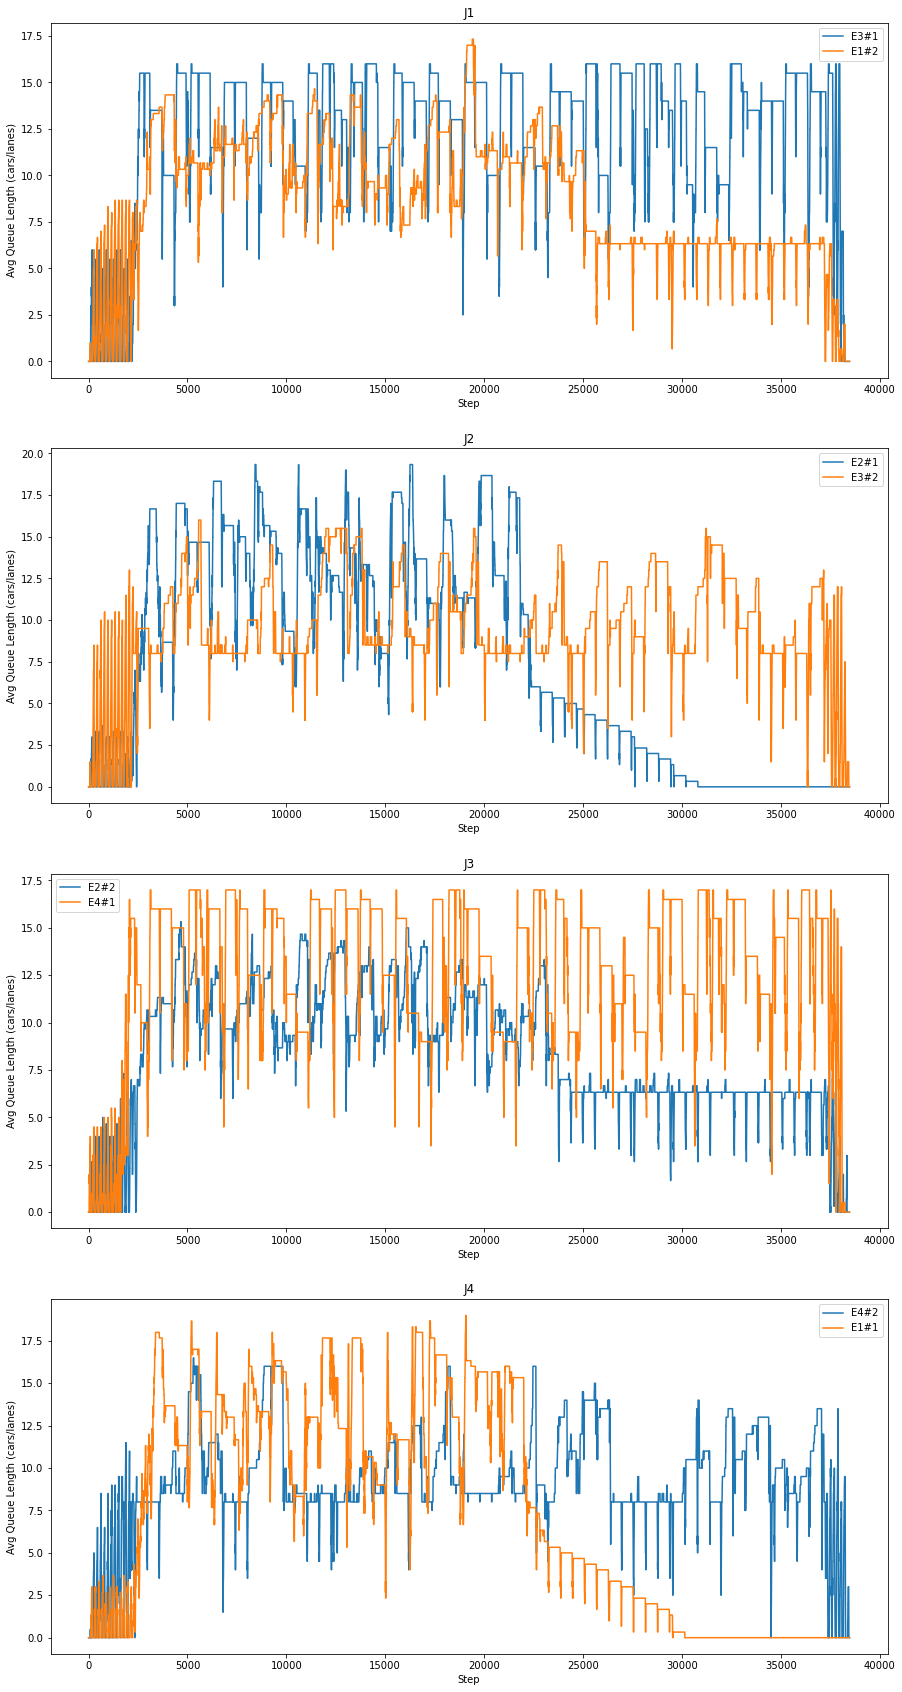

In [5]:
# Avg Queue Length By Traffic Light

plt.figure(figsize=(15, 30))

steps = [_['step'] for _ in simulation_data['data']]

traffic_lights_count = len(simulation_data['traffic_lights'])

for idx, traffic_light in enumerate(simulation_data['traffic_lights']):

    plt.subplot(traffic_lights_count, 1, idx + 1)
    plt.title(traffic_light['id'])
    plt.xlabel('Step')
    plt.ylabel('Avg Queue Length (cars/lanes)')

    traffic_light_data = {}

    for edge in traffic_light['controlled_edges']:
        traffic_light_data[edge['id']] = []

    for step in simulation_data['data']:
        for step_traffic_light in step['traffic_lights']:
            if step_traffic_light['id'] == traffic_light['id']:
                for controlled_edge in step_traffic_light['controlled_edges']:
                    traffic_light_data[controlled_edge['id']].append(
                        controlled_edge['avg_queue_length'])

    for edge in traffic_light['controlled_edges']:
        plt.plot(steps, traffic_light_data[edge['id']], label=edge['id'])
    plt.legend()

plt.show()
